# Unsupervised Learning

Agenda:
- Clustering and K-means clustering
- Dimensionality reduction and PCA


# ![Machine Learning Map](ml_map.svg)


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
def make_plot(df, k1, k2, hue=None):
    ax = sns.scatterplot(data=df, x='petal_length', y='petal_width', hue=hue)

    if k1 is not None:
        plt.scatter(k1[0], k1[1], color='lightgreen', marker='X', s=100, label='Cluster 1')
    if k2 is not None:
        plt.scatter(k2[0], k2[1], color='red', marker='X', s=100, label='Cluster 2')

    plt.xlabel('petal_length')
    plt.ylabel('petal_width')

    return ax


In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=[name.replace(' (cm)', '').replace(' ', '_') for name in iris.feature_names])
df['flower'] = pd.Categorical.from_codes(iris.target, categories=iris.target_names)


In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Clustering

Clustering is a problem of finding optimal ways to put observations into segments based on their feautures. A classical example is grouping customers into groups based on their purchasing petterns - frequency, how much they spend, etc.

K-means clustering is the most popular algorithm for clustering, and it's also very simple. It automatically discovers clusters that are optimal in terms of the total within-cluster variance.

But first let's look visually at how k-means clustering operates when we want to segment the data into two clusters.


<Axes: xlabel='petal_length', ylabel='petal_width'>

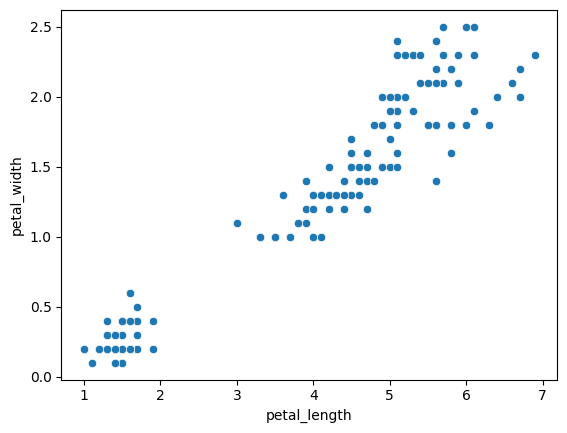

In [5]:
make_plot(df, None, None)

### Step 1

Choose cluster centroids randomly.


Centroid 1:  (np.float64(4.7), np.float64(1.4))
Centroid 2:  (np.float64(1.4), np.float64(0.1))


<Axes: xlabel='petal_length', ylabel='petal_width'>

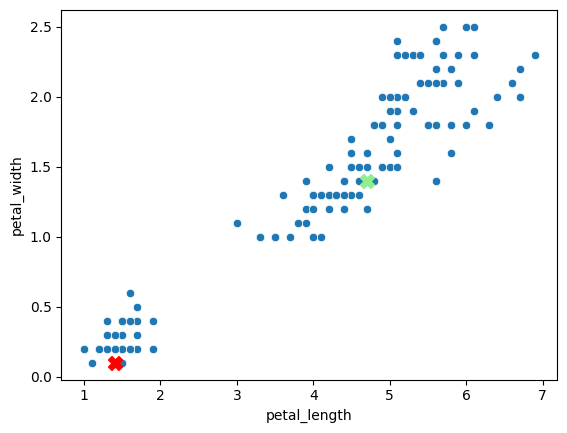

In [6]:
# Randomly select two data points from the dataset as initial centroids
random_indices = np.random.choice(len(df), 2, replace=False)
k1 = (
    df.iloc[random_indices[0]]["petal_length"],
    df.iloc[random_indices[0]]["petal_width"],
)
k2 = (
    df.iloc[random_indices[1]]["petal_length"],
    df.iloc[random_indices[1]]["petal_width"],
)
print("Centroid 1: ", k1)
print("Centroid 2: ", k2)
make_plot(df, k1, k2)

### Step 2

Assign each point to the closest centroid.

Reminder for Euclidian distance in two dimensions:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

where x and y are two points.

Euclidian distance in n dimensions:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

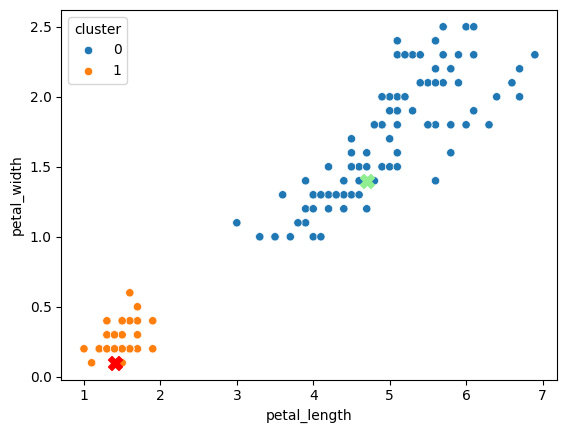

In [7]:
df["dist_to_k1"] = np.sqrt((df['petal_length'] - k1[0]) ** 2 + (df['petal_width'] - k1[1]) ** 2)
df["dist_to_k2"] = np.sqrt((df['petal_length'] - k2[0]) ** 2 + (df['petal_width'] - k2[1]) ** 2)

df["cluster"] = np.argmin(df[["dist_to_k1", "dist_to_k2"]], axis=1)

ax = make_plot(df, k1, k2, hue='cluster')


In [8]:
df[["sepal_length", "sepal_width", "dist_to_k1", "dist_to_k2", "cluster"]]


,sepal_length,sepal_width,dist_to_k1,dist_to_k2,cluster
0,5.1,3.5,3.511410,0.100000,1
1,4.9,3.0,3.511410,0.100000,1
2,4.7,3.2,3.605551,0.141421,1
3,4.6,3.1,3.417601,0.141421,1
4,5.0,3.6,3.511410,0.100000,1
...,...,...,...,...,...
145,6.7,3.0,1.029563,4.390900,0
146,6.3,2.5,0.583095,4.024922,0
147,6.5,3.0,0.781025,4.248529,0
148,6.2,3.4,1.140175,4.565085,0


### Repeat Steps 3 and 4

And now, repeat until the limit of iterations is reached or some convergence criteria reached:
- Step 3 - set the clusters to average of the assigned points
- Step 4 - recalculate nearest points

<Axes: xlabel='petal_length', ylabel='petal_width'>

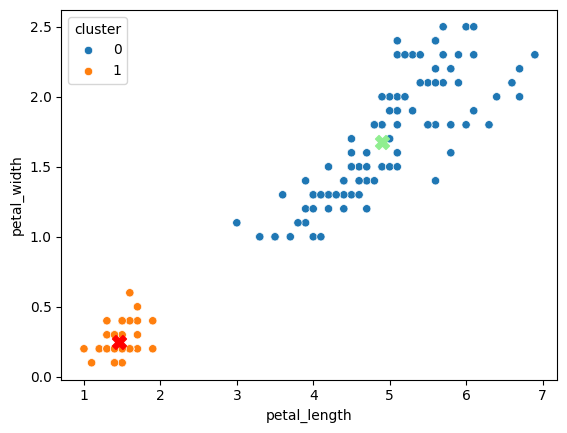

In [9]:
k1 = df[df['cluster'] == 0][['petal_length', 'petal_width']].mean().tolist()
k2 = df[df['cluster'] == 1][['petal_length', 'petal_width']].mean().tolist()

make_plot(df, k1, k2, hue='cluster')

<Axes: xlabel='petal_length', ylabel='petal_width'>

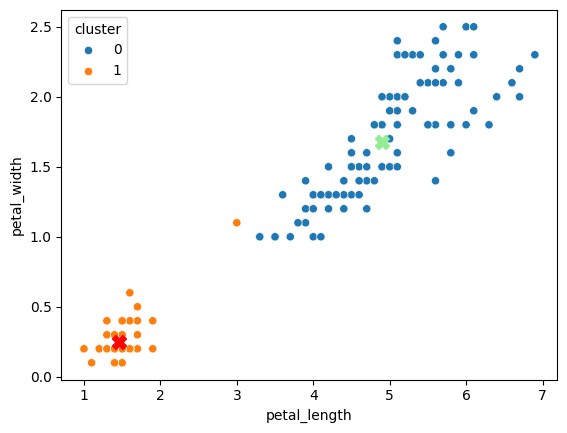

In [10]:
df["dist_to_k1"] = np.sqrt((df['petal_length'] - k1[0]) ** 2 + (df['petal_width'] - k1[1]) ** 2)
df["dist_to_k2"] = np.sqrt((df['petal_length'] - k2[0]) ** 2 + (df['petal_width'] - k2[1]) ** 2)
df["cluster"] = np.argmin(df[["dist_to_k1", "dist_to_k2"]], axis=1)

make_plot(df, k1, k2, hue='cluster')


### K-means in scikit-learn

As always, we don't have to worry about implementing the algorithm ourselves. Scikit-learn provides us with KMeans implementation that also includes some optimizations, like a more optimal way to choose the initial points.


<Axes: xlabel='petal_length', ylabel='petal_width'>

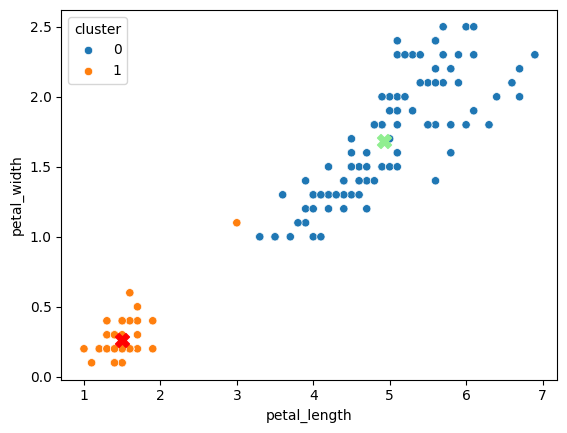

In [11]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(df[['petal_length', 'petal_width']]) # No y (target) column!
df['cluster'] = kmeans2.labels_
k1 = kmeans2.cluster_centers_[0]
k2 = kmeans2.cluster_centers_[1]

make_plot(df, k1, k2, hue='cluster')


But what is k-means minimizing? It's minimizing the sum of within-cluster variance (sum of squares).

$$
\text{WCSS} = \sum_{k=1}^{K} \sum_{i \in C_k} \lVert \mathbf{x}_i - \boldsymbol{\mu}_k \rVert^2
$$

For instance, what is the variance within the smaller cluster on the plot above?

In [12]:
points = df[['petal_length', 'petal_width']].values


In [13]:
# sum of squares within cluster 1
centroid = kmeans2.cluster_centers_[1]
cluster_points = points[df['cluster'] == 1]
ss1 = np.sum((cluster_points - centroid) ** 2)


In [14]:
# sum of squares within cluster 0
centroid = kmeans2.cluster_centers_[0]
cluster_points = points[df['cluster'] == 0]
ss0 = np.sum((cluster_points - centroid) ** 2)


In [15]:
# within-cluster sum of squares
ss1 + ss0

np.float64(86.39021984551397)

In [16]:
kmeans2.inertia_


86.39021984551397

Variance within the second cluster is a lot bigger, which also checks out visually. There also seems to be one point that the algorithm is placing in the wrong cluster visually.

If we were to use three centroids, the bigger cluster would get split because that would give a bigger reduction variance.


<Axes: xlabel='petal_length', ylabel='petal_width'>

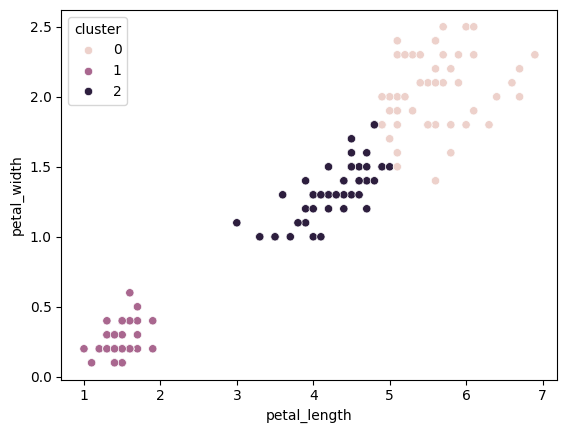

In [17]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(df[['petal_length', 'petal_width']])
df['cluster'] = kmeans3.labels_

make_plot(df, None, None, hue='cluster')

But what is WCSS or inertia of clustering into 3 clusters instead of 2?

In [18]:
kmeans3.inertia_

31.371358974358976

Now you might ask - what is the optimal number of clusters?


### Task

Calculate `inertia` for various values of k - in a for loop, fit kmeans with various values for n_clusters (k), save `inertia` into a list and the plot results. The end goal is to have k on the x axis, and inertia on the y axis. The range for k should be (2, 10).

What do you notice? How would you choose the optimal value for k?


<Axes: xlabel='k', ylabel='inertia'>

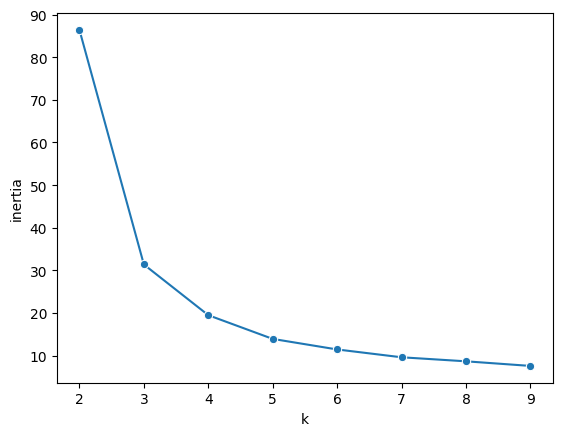

In [19]:
# Answer
inertias = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['petal_length', 'petal_width']])
    inertias.append(kmeans.inertia_)

elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertias})
sns.lineplot(x='k', y='inertia', data=elbow_data, marker='o')


Since k-means clustering is not a supervised learning algorithm, there is no obvious answer for how many clusters to choose. The variance will keep decreasing forever.

So how can we choose the optimal number for k? One method is called the elbow method - we look at the plot above and try to find values for `k`that form an elbow. On the plot above that elbow seems to be around k=3. This means that from k=2 to k=3 we saw a big decrease in inertia, but later those decreases were smaller, and thus we see the elbow.


We can also check how the clusters that the algorithm discovered overlap with actual flowers.


Text(0.5, 1.0, 'Actual Iris Species')

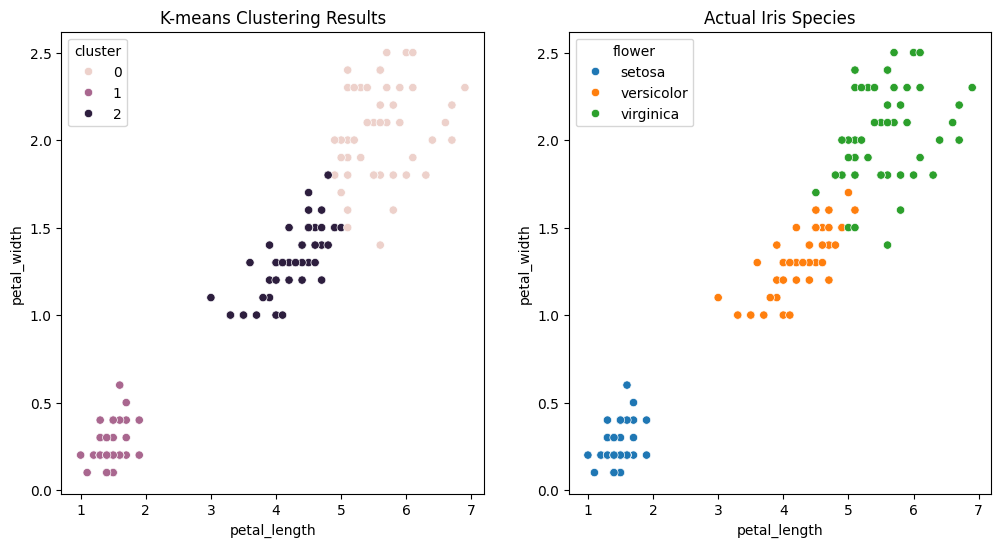

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(
    x='petal_length', 
    y='petal_width', 
    hue='cluster',
    data=df,
    ax=axs[0]
)
axs[0].set_title('K-means Clustering Results')

sns.scatterplot(
    x='petal_length', 
    y='petal_width', 
    hue='flower',
    data=df,
    ax=axs[1]
)
axs[1].set_title('Actual Iris Species')


## Dimensionality Reduction




In [21]:
df = df.drop(columns=["dist_to_k1", "dist_to_k2", "cluster"])

<Axes: xlabel='petal_length', ylabel='petal_width'>

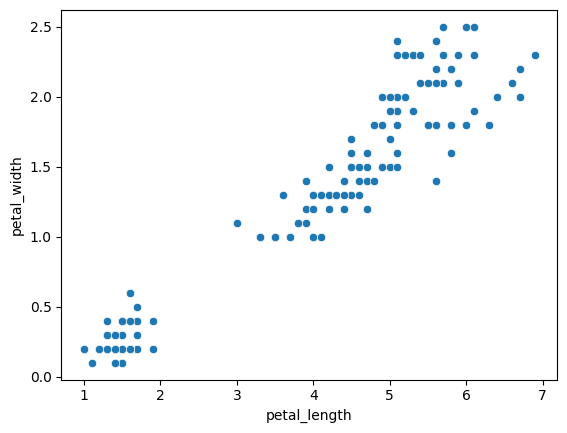

In [22]:
sns.scatterplot(x="petal_length", y="petal_width", data=df)

In [23]:
from sklearn.decomposition import PCA

X = df[["petal_length", "petal_width"]]

pca = PCA(n_components=1)
pca.fit(X)
component = pca.components_[0]
component

array([0.92177769, 0.38771882])

What we get out of the PCA algorithm is a vector that points in the direction of maximum variance.

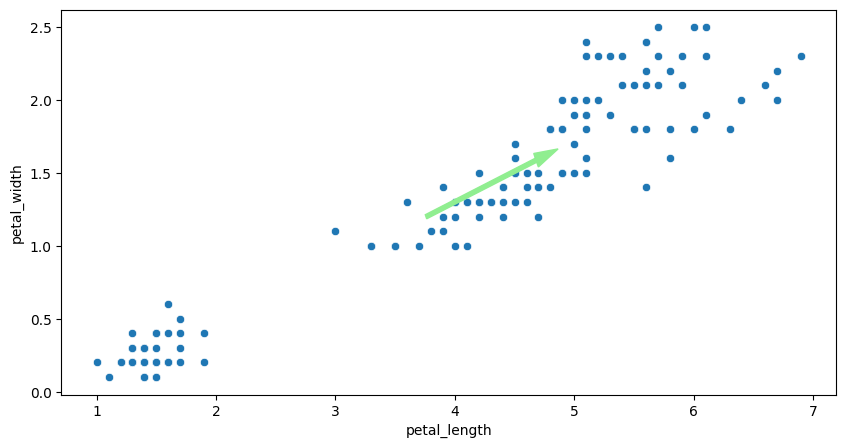

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

sns.scatterplot(x=X["petal_length"], y=X["petal_width"], ax=axs)

mean = pca.mean_
axs.arrow(
    mean[0],
    mean[1],
    component[0],
    component[1],
    head_width=0.1,
    head_length=0.2,
    fc="lightgreen",
    ec="lightgreen",
    width=0.03,
)


Since we have the vector that explains maximum variance, we can project our datapoints onto that vector while preserving the maximum amount of information.

In [25]:
X_pca = pca.transform(X)
df["pca_component"] = X_pca.flatten()
df[["petal_length", "petal_width", "pca_component"]].sample(10)

,petal_length,petal_width,pca_component
75,4.4,1.4,0.669584
20,1.7,0.2,-2.284479
98,3.0,1.1,-0.737221
79,3.5,1.0,-0.315104
71,4.0,1.3,0.262101
28,1.4,0.2,-2.561012
44,1.9,0.4,-2.022580
131,6.4,2.0,2.745770
61,4.2,1.5,0.524000
128,5.6,2.1,2.047120


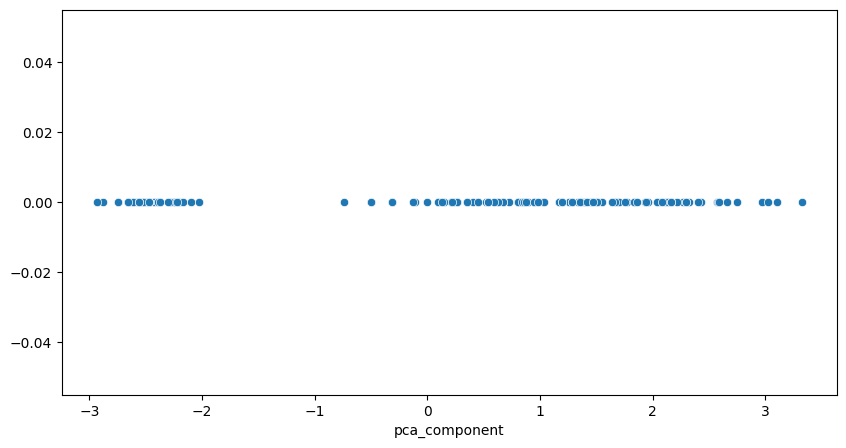

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

ax = sns.scatterplot(
    x="pca_component",
    y=np.zeros(len(df)),
    data=df,
)


What we got out of applying PCA?
1. We reduced the number of features from 2 to 1.
2. We have guarantees that the new feature contains the maximum amount of information - it's the most optimal linear combination in terms of preserving variance.


### Task

Using PCA, reduce the dimensions of the dataset from four features to two. Plot the new dataset on a scatterplot and indicate which point belongs to which flower.


<Axes: xlabel='component_1', ylabel='component_2'>

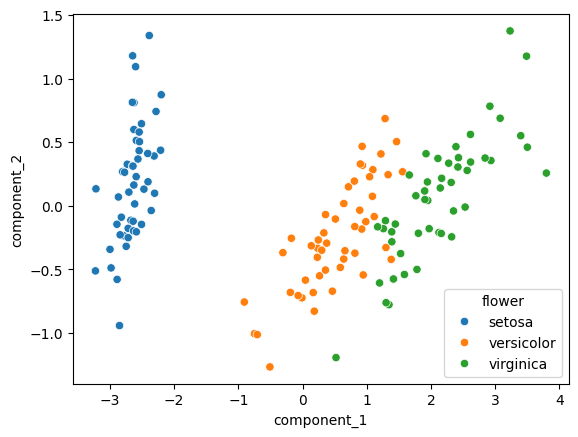

In [30]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
df["component_1"] = X_pca[:, 0]
df["component_2"] = X_pca[:, 1]

sns.scatterplot(x="component_1", y="component_2", hue="flower", data=df)


### Task

Apply K-means clustering to the new features.


<Axes: xlabel='component_1', ylabel='component_2'>

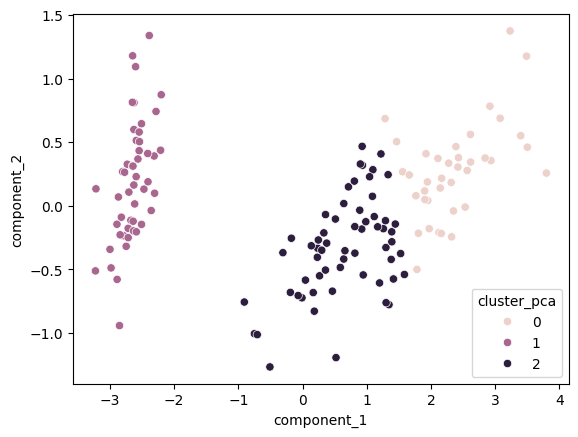

In [31]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df[["component_1", "component_2"]])
df["cluster_pca"] = kmeans_pca.labels_

sns.scatterplot(x="component_1", y="component_2", hue="cluster_pca", data=df)
